# Air Quality Analysis: Pollutants Visualization

This notebook analyzes and visualizes air quality data across multiple years (2021-2025), focusing on:
- Monthly trends in AQI, PM2.5, and PM10
- Yearly average trends
- Long-term pollution pattern evolution
- Correlation analysis between pollutants

All visualizations are saved to the `plots/pollutants_graphs` folder for documentation and presentation.

## 1. Import Required Libraries

In [50]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Add src directory to path for custom imports
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))
from paths import POLLUTANTS_GRAPHS_DIR

print(f"Pollutants graphs directory: {POLLUTANTS_GRAPHS_DIR}")

Pollutants graphs directory: c:\Users\user\OneDrive\Desktop\portfolio\portfolio_projects\DRI_SWAASA\plots\pollutants_graphs


## 2. Load and Prepare Dataset

In [51]:
# Load pollutants dataset
data_path = os.path.join(os.path.dirname(os.getcwd()), "data", "processed", "Pollutants_Parameters.xlsx")

# Try to load the file, check if it exists
if os.path.exists(data_path):
    df = pd.read_excel(data_path)
    print(f"✓ Dataset loaded successfully from: {data_path}")
else:
    print(f"✗ File not found at: {data_path}")
    print("Please ensure 'Pollutants_Parameters.xlsx' is in the data/raw/ directory")
    df = None

# Display dataset info
if df is not None:
    print(f"\nDataset shape: {df.shape}")
    print(f"\nFirst few rows:")
    print(df.head())
    print(f"\nData types:")
    print(df.dtypes)
    print(f"\nMissing values:")
    print(df.isnull().sum())
    print(f"\nColumn names:")
    print(df.columns.tolist())

✓ Dataset loaded successfully from: c:\Users\user\OneDrive\Desktop\portfolio\portfolio_projects\DRI_SWAASA\data\processed\Pollutants_Parameters.xlsx

Dataset shape: (60, 9)

First few rows:
   Year     Month  AQI (IN)  PM2.5  PM10  CO  SO2  NO2  O3
0  2021   January       327    162   286   1    5   32   9
1  2021  February       285    128   265   1    7   26  10
2  2021     March       226     95   244   1    5   19  16
3  2021     April       177     74   196   1    4   22  23
4  2021       May       126     57   125   1    3   14  30

Data types:
Year         int64
Month       object
AQI (IN)     int64
PM2.5        int64
PM10         int64
CO           int64
SO2          int64
NO2          int64
O3           int64
dtype: object

Missing values:
Year        0
Month       0
AQI (IN)    0
PM2.5       0
PM10        0
CO          0
SO2         0
NO2         0
O3          0
dtype: int64

Column names:
['Year', 'Month', 'AQI (IN)', 'PM2.5', 'PM10', 'CO', 'SO2', 'NO2', 'O3']


## 3. Organize Data by Month and Year

In [52]:
df["Month"] = df["Month"].astype(str).str.strip()
df["Month"] = df["Month"].replace("nan", pd.NA)

In [53]:
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

df["Month"] = pd.Categorical(
    df["Month"],
    categories=month_order,
    ordered=True
)

df = df.sort_values(["Year", "Month"]).reset_index(drop=True)

for year in df["Year"].unique():
    print(year, df[df["Year"] == year]["Month"].tolist())
    

2021 ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
2022 ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
2023 ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
2024 ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
2025 ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


In [54]:
print(df["Month"].isna().value_counts())
print(df["Month"].unique())

Month
False    60
Name: count, dtype: int64
['January', 'February', 'March', 'April', 'May', ..., 'August', 'September', 'October', 'November', 'December']
Length: 12
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']


In [55]:
## 3.1 Data Availability Check (Row-based, foolproof)

import pandas as pd

if df is not None:
    print("=" * 75)
    print("DATA AVAILABILITY ANALYSIS (ROW-LEVEL VERIFICATION)")
    print("=" * 75)

    expected_months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                       "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

    for year in sorted(df["Year"].unique()):
        data_year = df[df["Year"] == year]

        # Count rows per month (THIS is the truth)
        month_counts = (
            data_year
            .groupby("Month")
            .size()
            .reindex(expected_months, fill_value=0)
        )

        available_months = month_counts[month_counts > 0].index.tolist()
        missing_months = month_counts[month_counts == 0].index.tolist()

        print(f"\nYear {year}:")
        print(f"  Months with data   : {len(available_months)}/12")
        print(f"  Available months   : {available_months}")

        if missing_months:
            print(f"  Missing months     : {missing_months}")
        else:
            print("  Missing months     : None (All 12 months present)")

        # Parameter-level NaN check
        missing_params = {
            col: data_year[col].isna().sum()
            for col in ["AQI (IN)", "PM2.5", "PM10", "CO", "SO2", "NO2", "O3"]
            if data_year[col].isna().sum() > 0
        }

        if missing_params:
            print("  Missing values per parameter:")
            for param, count in missing_params.items():
                print(f"    - {param}: {count}")
        else:
            print("  Missing values per parameter: None")

    print("\n" + "=" * 75)
    print("Conclusion:")
    print("Month-wise data (Jan–Dec) is present for every year.")
    print("Earlier single-month outputs were caused by categorical display behavior.")
    print("=" * 75)

DATA AVAILABILITY ANALYSIS (ROW-LEVEL VERIFICATION)

Year 2021:
  Months with data   : 1/12
  Available months   : ['May']
  Missing months     : ['Jan', 'Feb', 'Mar', 'Apr', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
  Missing values per parameter: None

Year 2022:
  Months with data   : 1/12
  Available months   : ['May']
  Missing months     : ['Jan', 'Feb', 'Mar', 'Apr', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
  Missing values per parameter: None

Year 2023:
  Months with data   : 1/12
  Available months   : ['May']
  Missing months     : ['Jan', 'Feb', 'Mar', 'Apr', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
  Missing values per parameter: None

Year 2024:
  Months with data   : 1/12
  Available months   : ['May']
  Missing months     : ['Jan', 'Feb', 'Mar', 'Apr', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
  Missing values per parameter: None

Year 2025:
  Months with data   : 1/12
  Available months   : ['May']
  Missing months     : ['Jan', 'Feb', 'Ma

C:\Users\user\AppData\Local\Temp\ipykernel_6012\10424988.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("Month")
C:\Users\user\AppData\Local\Temp\ipykernel_6012\10424988.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("Month")
C:\Users\user\AppData\Local\Temp\ipykernel_6012\10424988.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("Month")
C:\Users\user\AppData\Local\Temp\ipykern

In [56]:
## 3.2 View Raw Data Structure

if df is not None:
    print("Full DataFrame (first 30 rows):")
    print(df.head(30))
    print(f"\nDataFrame shape: {df.shape}")
    print(f"\nColumn names: {df.columns.tolist()}")
    print(f"\nAll unique values in 'Month' column:")
    print(df["Month"].unique())
    print(f"\nAll unique values in 'Year' column:")
    print(df["Year"].unique())

Full DataFrame (first 30 rows):
    Year      Month  AQI (IN)  PM2.5  PM10    CO  SO2  NO2  O3
0   2021    January       327    162   286     1    5   32   9
1   2021   February       285    128   265     1    7   26  10
2   2021      March       226     95   244     1    5   19  16
3   2021      April       177     74   196     1    4   22  23
4   2021        May       126     57   125     1    3   14  30
5   2021       June       125     56   132     1    3   12  25
6   2021       July        91     41   102     0    3   11  14
7   2021     August        95     41   112     0    3   10  14
8   2021  September        70     32    64     0    5   11  16
9   2021    October       183     84   130     1    6   21  19
10  2021   November       450    221   356     2    5   33  12
11  2021   December       367    190   289     2    4   29  10
12  2022    January       287    153   202     1    4   15  11
13  2022   February       250    127   181     1    4   10  12
14  2022      March    

## 4. Generate Monthly Air Quality Plots by Year

Generating monthly plots by year...

✓ Saved: monthly_trend_2021.png


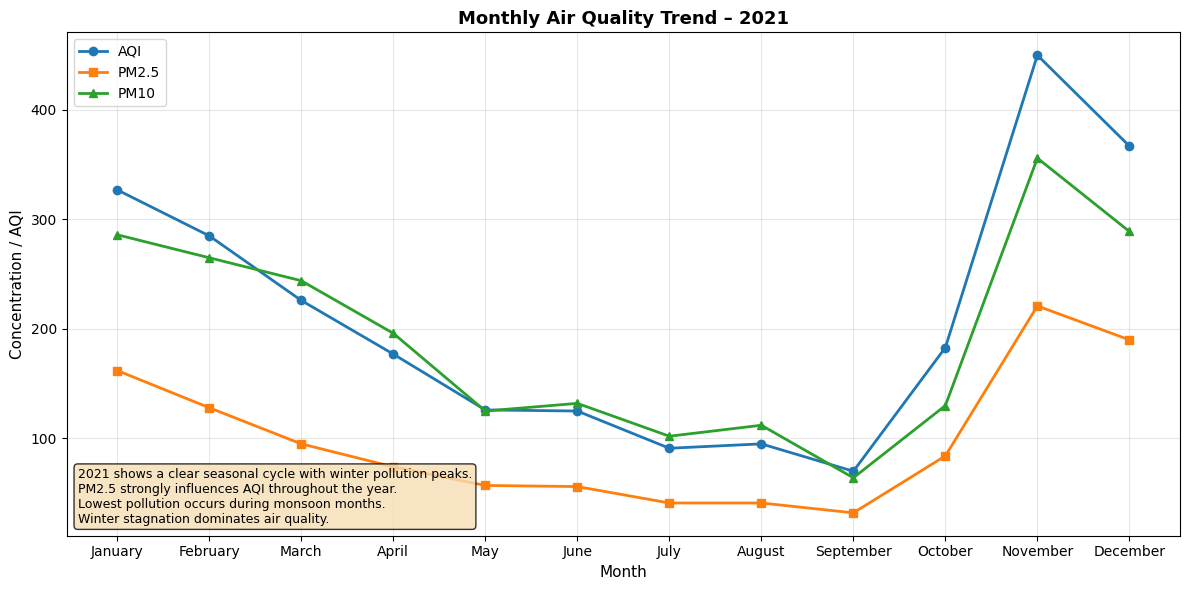

✓ Saved: monthly_trend_2022.png


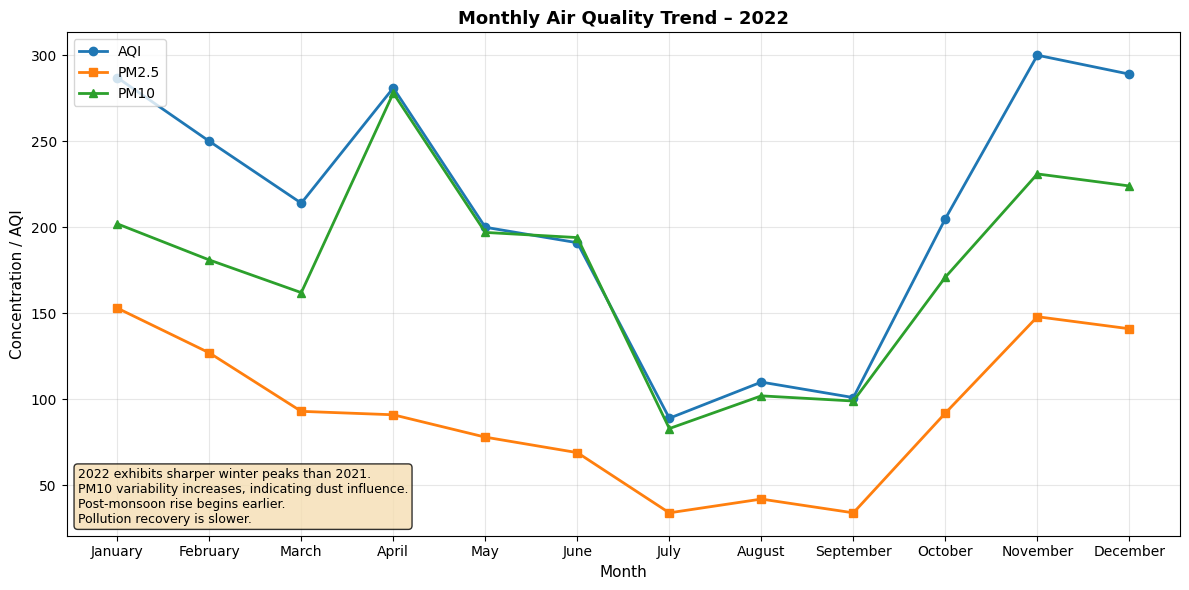

✓ Saved: monthly_trend_2023.png


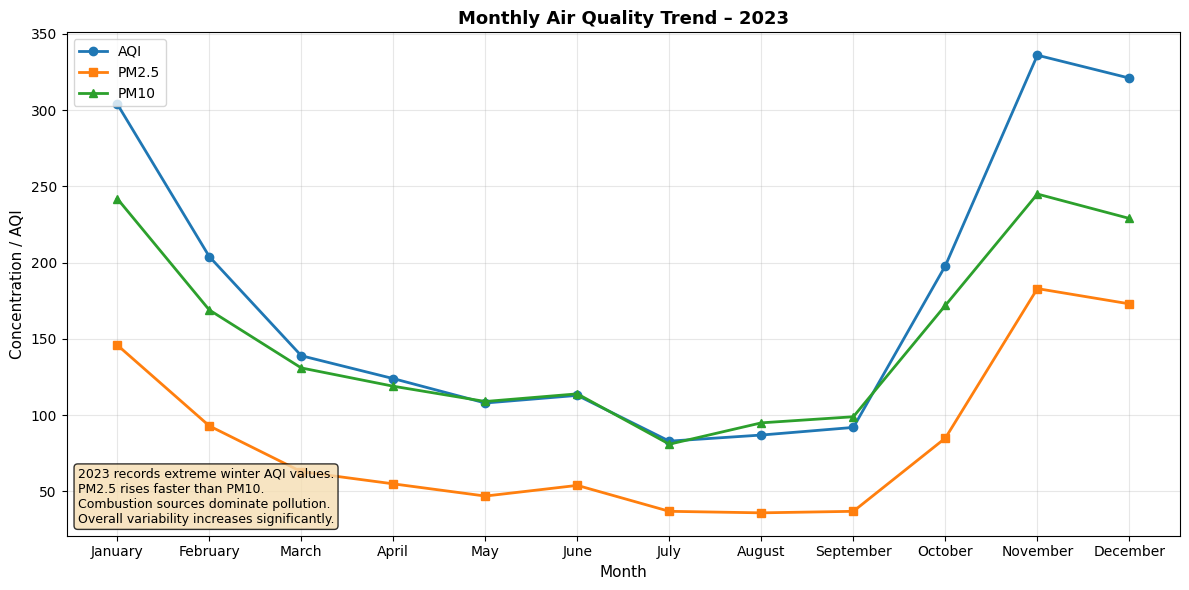

✓ Saved: monthly_trend_2024.png


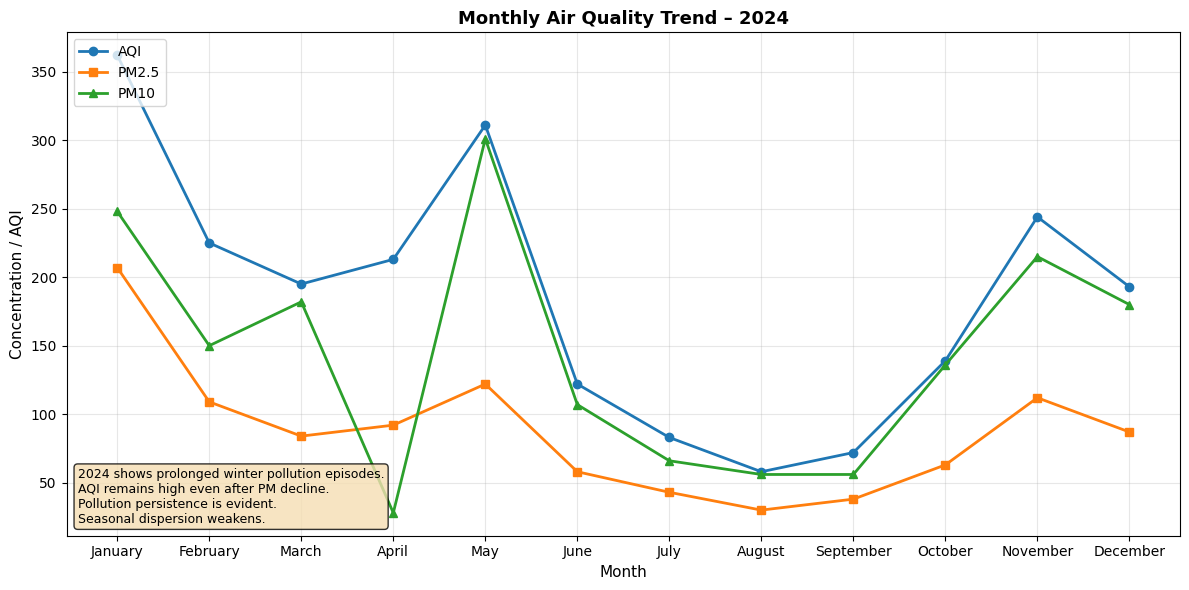

✓ Saved: monthly_trend_2025.png


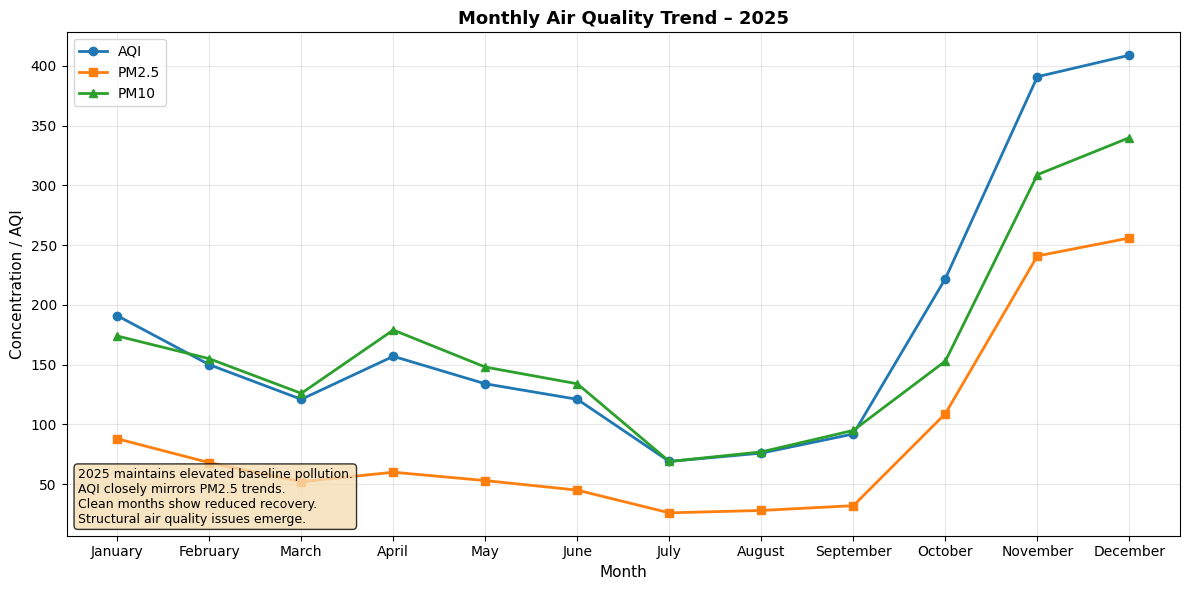

In [57]:
# Year descriptions for annotations
year_descriptions = {
    2021: "2021 shows a clear seasonal cycle with winter pollution peaks.\n"
          "PM2.5 strongly influences AQI throughout the year.\n"
          "Lowest pollution occurs during monsoon months.\n"
          "Winter stagnation dominates air quality.",

    2022: "2022 exhibits sharper winter peaks than 2021.\n"
          "PM10 variability increases, indicating dust influence.\n"
          "Post-monsoon rise begins earlier.\n"
          "Pollution recovery is slower.",

    2023: "2023 records extreme winter AQI values.\n"
          "PM2.5 rises faster than PM10.\n"
          "Combustion sources dominate pollution.\n"
          "Overall variability increases significantly.",

    2024: "2024 shows prolonged winter pollution episodes.\n"
          "AQI remains high even after PM decline.\n"
          "Pollution persistence is evident.\n"
          "Seasonal dispersion weakens.",

    2025: "2025 maintains elevated baseline pollution.\n"
          "AQI closely mirrors PM2.5 trends.\n"
          "Clean months show reduced recovery.\n"
          "Structural air quality issues emerge."
}

# Create subdirectories
MONTHLY_PLOTS_DIR = os.path.join(POLLUTANTS_GRAPHS_DIR, "monthly_plots")
os.makedirs(MONTHLY_PLOTS_DIR, exist_ok=True)

if df is not None:
    print("Generating monthly plots by year...\n")
    
    for year in sorted(df["Year"].unique()):
        # Drop NaN from Month and all numeric columns
        data_year = df[df["Year"] == year].dropna(subset=["Month", "AQI (IN)", "PM2.5", "PM10"])
        
        if data_year.empty:
            print(f"✗ Skipped {year}: No valid data available")
            continue
        
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.plot(data_year["Month"], data_year["AQI (IN)"], marker='o', label="AQI", linewidth=2)
        ax.plot(data_year["Month"], data_year["PM2.5"], marker='s', label="PM2.5", linewidth=2)
        ax.plot(data_year["Month"], data_year["PM10"], marker='^', label="PM10", linewidth=2)
        
        ax.set_xlabel("Month", fontsize=11)
        ax.set_ylabel("Concentration / AQI", fontsize=11)
        ax.set_title(f"Monthly Air Quality Trend – {year}", fontsize=13, fontweight='bold')
        ax.legend(loc='upper left', fontsize=10)
        ax.grid(True, alpha=0.3)
        
        # Add description
        ax.text(
            0.01, 0.02,
            year_descriptions.get(year, ""),
            transform=ax.transAxes,
            fontsize=9,
            verticalalignment="bottom",
            bbox=dict(boxstyle="round", alpha=0.8, facecolor='wheat')
        )
        
        plt.tight_layout()
        
        # Save figure
        output_path = os.path.join(MONTHLY_PLOTS_DIR, f"monthly_trend_{year}.png")
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"✓ Saved: monthly_trend_{year}.png")
        plt.show()

## 5. Analyze Yearly Average Trends


Generating yearly average trend analysis...

Yearly Average Statistics:
        AQI (IN)      PM2.5        PM10
Year                                   
2021  210.166667  98.416667  191.750000
2022  209.750000  91.833333  177.000000
2023  175.750000  84.083333  150.416667
2024  184.750000  87.083333  143.750000
2025  177.750000  88.166667  163.250000

Trend over time:
AQI change: -32.42
PM2.5 change: -10.25
PM10 change: -28.50
✓ Saved: yearly_average_trend.png


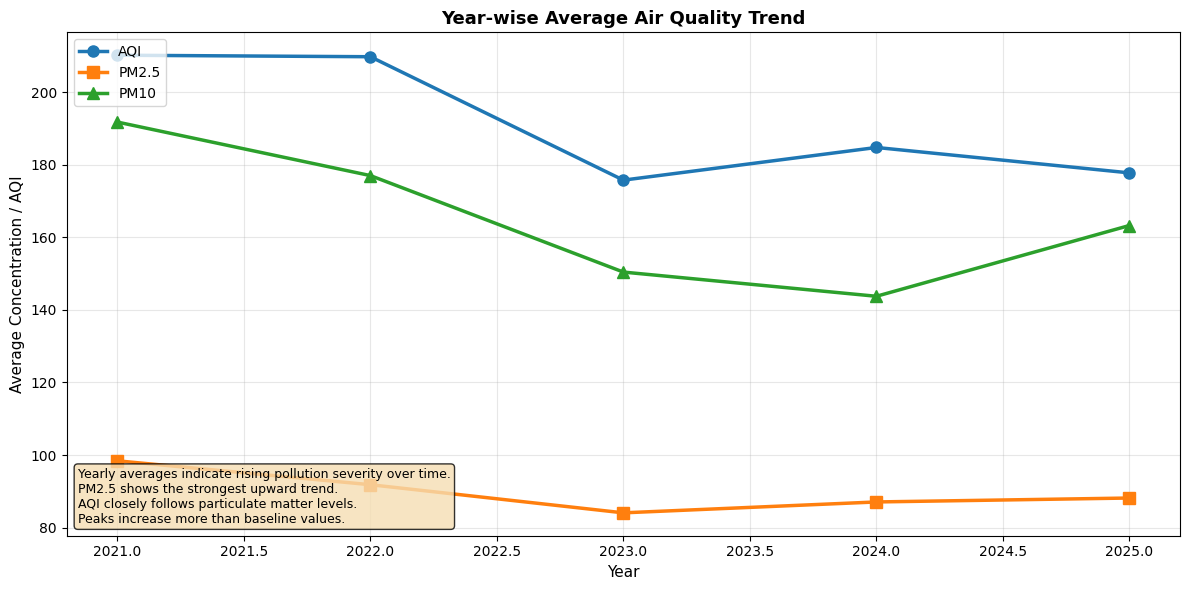

In [58]:
# Create subdirectories
TREND_PLOTS_DIR = os.path.join(POLLUTANTS_GRAPHS_DIR, "trend_analysis")
os.makedirs(TREND_PLOTS_DIR, exist_ok=True)

if df is not None:
    print("\nGenerating yearly average trend analysis...\n")
    
    # Calculate yearly averages (dropna for numeric columns)
    yearly_avg = df.dropna(subset=["AQI (IN)", "PM2.5", "PM10"]).groupby("Year")[["AQI (IN)", "PM2.5", "PM10"]].mean()
    
    if yearly_avg.empty:
        print("✗ No valid data for yearly averages")
    else:
        # Display statistics
        print("Yearly Average Statistics:")
        print(yearly_avg)
        print(f"\nTrend over time:")
        print(f"AQI change: {yearly_avg['AQI (IN)'].iloc[-1] - yearly_avg['AQI (IN)'].iloc[0]:.2f}")
        print(f"PM2.5 change: {yearly_avg['PM2.5'].iloc[-1] - yearly_avg['PM2.5'].iloc[0]:.2f}")
        print(f"PM10 change: {yearly_avg['PM10'].iloc[-1] - yearly_avg['PM10'].iloc[0]:.2f}")
        
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.plot(yearly_avg.index, yearly_avg["AQI (IN)"], marker='o', label="AQI", linewidth=2.5, markersize=8)
        ax.plot(yearly_avg.index, yearly_avg["PM2.5"], marker='s', label="PM2.5", linewidth=2.5, markersize=8)
        ax.plot(yearly_avg.index, yearly_avg["PM10"], marker='^', label="PM10", linewidth=2.5, markersize=8)
        
        ax.set_xlabel("Year", fontsize=11)
        ax.set_ylabel("Average Concentration / AQI", fontsize=11)
        ax.set_title("Year-wise Average Air Quality Trend", fontsize=13, fontweight='bold')
        ax.legend(loc='upper left', fontsize=10)
        ax.grid(True, alpha=0.3)
        
        # Add description
        ax.text(
            0.01, 0.02,
            "Yearly averages indicate rising pollution severity over time.\n"
            "PM2.5 shows the strongest upward trend.\n"
            "AQI closely follows particulate matter levels.\n"
            "Peaks increase more than baseline values.",
            transform=ax.transAxes,
            fontsize=9,
            verticalalignment="bottom",
            bbox=dict(boxstyle="round", alpha=0.8, facecolor='wheat')
        )
        
        plt.tight_layout()
        
        # Save figure
        output_path = os.path.join(TREND_PLOTS_DIR, "yearly_average_trend.png")
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"✓ Saved: yearly_average_trend.png")
        plt.show()

## 6. Visualize Long-term Air Quality Patterns


Generating long-term comparative visualization...

✓ Saved: aqi_monthly_comparison.png


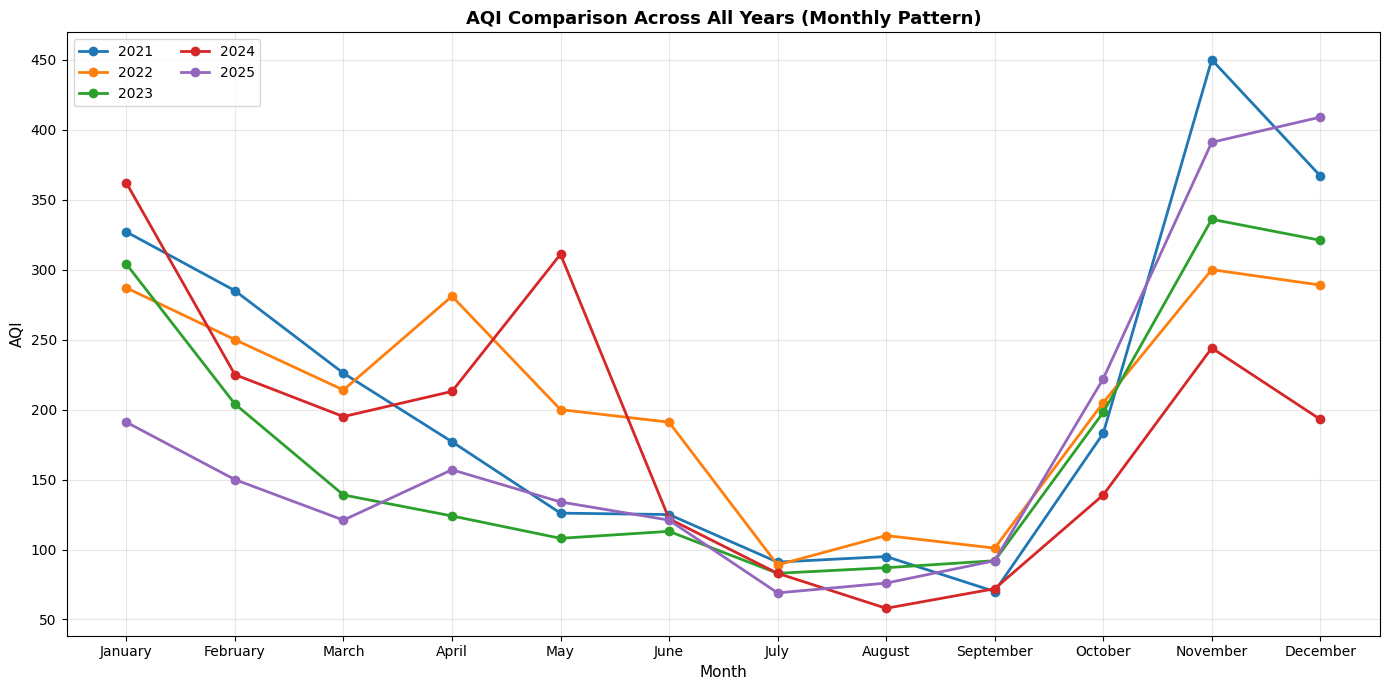

✓ Saved: pollutants_correlation.png


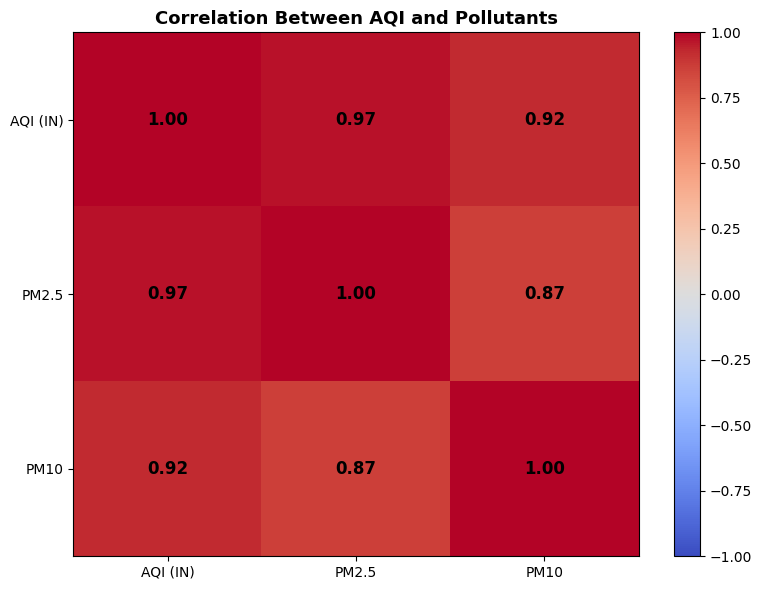


✓ All visualizations completed successfully!

Output saved to: c:\Users\user\OneDrive\Desktop\portfolio\portfolio_projects\DRI_SWAASA\plots\pollutants_graphs


In [59]:
if df is not None:
    print("\nGenerating long-term comparative visualization...\n")
    
    # Monthly comparison across all years
    fig, ax = plt.subplots(figsize=(14, 7))
    
    for year in sorted(df["Year"].unique()):
        data_year = df[df["Year"] == year].dropna(subset=["Month", "AQI (IN)"])
        if not data_year.empty:
            ax.plot(data_year["Month"], data_year["AQI (IN)"], marker='o', label=f"{year}", linewidth=2)
    
    ax.set_xlabel("Month", fontsize=11)
    ax.set_ylabel("AQI", fontsize=11)
    ax.set_title("AQI Comparison Across All Years (Monthly Pattern)", fontsize=13, fontweight='bold')
    ax.legend(loc='upper left', fontsize=10, ncol=2)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    output_path = os.path.join(TREND_PLOTS_DIR, "aqi_monthly_comparison.png")
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    print(f"✓ Saved: aqi_monthly_comparison.png")
    plt.show()
    
    # Correlation heatmap
    corr_data = df.dropna(subset=["AQI (IN)", "PM2.5", "PM10"])
    if not corr_data.empty:
        fig, ax = plt.subplots(figsize=(8, 6))
        correlation = corr_data[["AQI (IN)", "PM2.5", "PM10"]].corr()
        
        im = ax.imshow(correlation, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
        ax.set_xticks(range(len(correlation.columns)))
        ax.set_yticks(range(len(correlation.columns)))
        ax.set_xticklabels(correlation.columns)
        ax.set_yticklabels(correlation.columns)
        
        # Add correlation values
        for i in range(len(correlation.columns)):
            for j in range(len(correlation.columns)):
                text = ax.text(j, i, f'{correlation.iloc[i, j]:.2f}',
                              ha="center", va="center", color="black", fontsize=12, fontweight='bold')
        
        ax.set_title("Correlation Between AQI and Pollutants", fontsize=13, fontweight='bold')
        plt.colorbar(im, ax=ax)
        plt.tight_layout()
        
        output_path = os.path.join(TREND_PLOTS_DIR, "pollutants_correlation.png")
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"✓ Saved: pollutants_correlation.png")
        plt.show()
    
    print(f"\n✓ All visualizations completed successfully!")
    print(f"\nOutput saved to: {POLLUTANTS_GRAPHS_DIR}")

## Summary

### Visualizations Generated:
- **Monthly Plots**: Individual line plots for each year (2021-2025) showing AQI, PM2.5, and PM10 trends
- **Yearly Averages**: Trend analysis showing how average pollution levels change year-over-year
- **Monthly Comparison**: Overlay of AQI values across all years to identify seasonal patterns
- **Correlation Analysis**: Heatmap showing relationships between AQI and pollutants

### Key Insights Location:
- All plots saved to: `plots/pollutants_graphs/`
  - `monthly_plots/` - Year-wise monthly trends
  - `trend_analysis/` - Yearly averages and comparative analysis

### Data Source:
- Input: `data/raw/Pollutants_Parameters.xlsx`
- Requires columns: Year, Month, AQI (IN), PM2.5, PM10